# Libraries

In [69]:
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import gower

# Preliminary EDA

## Loading the CSV File

In [70]:
# Path settings csv file
csv_filepath = '../data/raw/mental-heath-in-tech-2016_20161114.csv'

# Loading the csv file
data = pd.read_csv(csv_filepath)
print("Data loaded successfully")

# Show data
data.head()

Data loaded successfully


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [71]:
# Print list of all column names in order to rename and shorten them
print(data.columns)

# Count the columns
num_columns = len(data.columns)

print(f"the csv file contains {num_columns} columns.")

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [72]:
# List of new column names
columns = [
    'Self_Employed',
    'Num_Employees',
    'Tech_Company_Primary',
    'Tech_Role_Primary',
    'MH_Benefits_Provided',
    'MH_Options_Awareness',
    'MH_Discussions_Formal',
    'MH_Resources_Offered',
    'Anonymity_Protection',
    'Medical_Leave_Policy',
    'Neg_Cons_MH_Discussion_Employer',
    'Neg_Cons_Physical_Discussion_Employer',
    'Comfort_Discuss_MH_Coworkers',
    'Comfort_Discuss_MH_Supervisors',
    'Employer_Attitude_MH_vs_Physical',
    'Observed_Neg_Cons_Coworkers_MH',
    'Medical_Coverage_MH',
    'Local_Online_MH_Resources_Awareness',
    'Disclosure_to_Clients_Business_Contacts',
    'Impact_of_Disclosure_Business_Relationships',
    'Disclosure_to_Coworkers_Employees',
    'Impact_of_Disclosure_Work_Relationships',
    'Productivity_Affected_by_MH',
    'Work_Time_Affected_by_MH_Percentage',
    'Previous_Employers_Exist',
    'Previous_Employers_Provided_MH_Benefits',
    'Aware_of_MH_Options_Previous_Employers',
    'Previous_Employers_Discussed_MH_Formally',
    'Previous_Employers_MH_Resources',
    'Anonymity_Protection_Previous_Employers',
    'Neg_Cons_MH_Previous_Employers',
    'Neg_Cons_Physical_Previous_Employers',
    'Willingness_Discuss_MH_Previous_Coworkers',
    'Willingness_Discuss_MH_Previous_Supervisors',
    'Previous_Employers_Attitude_MH_vs_Physical',
    'Observed_Neg_Cons_Previous_Employers_MH',
    'Willingness_Discuss_Physical_Health_Interview',
    'Reasons_Not_Discuss_Physical_Health_Interview',
    'Willingness_Discuss_MH_Interview',
    'Reasons_Not_Discuss_MH_Interview',
    'Perceived_Career_Impact_MH_Disclosure',
    'CoWorkers_View_If_Aware_MH',
    'Willingness_Share_MH_with_Friends_Family',
    'Unsupportive_Response_MH_Workplace',
    'Impact_Others_Disclosure_Personal_MH_Disclosure',
    'Family_History_Mental_Illness',
    'History_MH_Disorder_Past',
    'Current_MH_Disorder',
    'Diagnosed_MH_Conditions',
    'Believed_MH_Conditions',
    'Diagnosed_MH_Condition_by_Professional',
    'Diagnosed_MH_Conditions_List',
    'Sought_Treatment_MH_Professional',
    'Interference_Work_Treated_MH_Effectively',
    'Interference_Work_Untreated_MH_Effectively',
    'Age',
    'Gender',
    'Country_Residence',
    'US_State_Territory_Residence',
    'Country_Work',
    'US_State_Territory_Work',
    'Work_Position_Description',
    'Remote_Work'
]

# Count the columns to be sure there are still 63
num_columns = len(columns)

# Show number of columns
print("Number of columns:", num_columns)

Number of columns: 63


In [73]:
# Rename the columns
new_columns = [
    'Self_Employed',
    'Num_Employees',
    'Tech_Company_Primary',
    'Tech_Role_Primary',
    'MH_Benefits_Provided',
    'MH_Options_Awareness',
    'MH_Discussions_Formal',
    'MH_Resources_Offered',
    'Anonymity_Protection',
    'Medical_Leave_Policy',
    'Neg_Cons_MH_Discussion_Employer',
    'Neg_Cons_Physical_Discussion_Employer',
    'Comfort_Discuss_MH_Coworkers',
    'Comfort_Discuss_MH_Supervisors',
    'Employer_Attitude_MH_vs_Physical',
    'Observed_Neg_Cons_Coworkers_MH',
    'Medical_Coverage_MH',
    'Local_Online_MH_Resources_Awareness',
    'Disclosure_to_Clients_Business_Contacts',
    'Impact_of_Disclosure_Business_Relationships',
    'Disclosure_to_Coworkers_Employees',
    'Impact_of_Disclosure_Work_Relationships',
    'Productivity_Affected_by_MH',
    'Work_Time_Affected_by_MH_Percentage',
    'Previous_Employers_Exist',
    'Previous_Employers_Provided_MH_Benefits',
    'Aware_of_MH_Options_Previous_Employers',
    'Previous_Employers_Discussed_MH_Formally',
    'Previous_Employers_MH_Resources',
    'Anonymity_Protection_Previous_Employers',
    'Neg_Cons_MH_Previous_Employers',
    'Neg_Cons_Physical_Previous_Employers',
    'Willingness_Discuss_MH_Previous_Coworkers',
    'Willingness_Discuss_MH_Previous_Supervisors',
    'Previous_Employers_Attitude_MH_vs_Physical',
    'Observed_Neg_Cons_Previous_Employers_MH',
    'Willingness_Discuss_Physical_Health_Interview',
    'Reasons_Not_Discuss_Physical_Health_Interview',
    'Willingness_Discuss_MH_Interview',
    'Reasons_Not_Discuss_MH_Interview',
    'Perceived_Career_Impact_MH_Disclosure',
    'CoWorkers_View_If_Aware_MH',
    'Willingness_Share_MH_with_Friends_Family',
    'Unsupportive_Response_MH_Workplace',
    'Impact_Others_Disclosure_Personal_MH_Disclosure',
    'Family_History_Mental_Illness',
    'History_MH_Disorder_Past',
    'Current_MH_Disorder',
    'Diagnosed_MH_Conditions',
    'Believed_MH_Conditions',
    'Diagnosed_MH_Condition_by_Professional',
    'Diagnosed_MH_Conditions_List',
    'Sought_Treatment_MH_Professional',
    'Interference_Work_Treated_MH_Effectively',
    'Interference_Work_Untreated_MH_Effectively',
    'Age',
    'Gender',
    'Country_Residence',
    'US_State_Territory_Residence',
    'Country_Work',
    'US_State_Territory_Work',
    'Work_Position_Description',
    'Remote_Work'
]

# Replace old column names
data.columns = new_columns

# Show the first bunch of columns to make sure the transformation worked
print("Data loaded successfully with updated column names:")
data.head()

Data loaded successfully with updated column names:


,Self_Employed,Num_Employees,Tech_Company_Primary,Tech_Role_Primary,MH_Benefits_Provided,MH_Options_Awareness,MH_Discussions_Formal,MH_Resources_Offered,Anonymity_Protection,Medical_Leave_Policy,...,Interference_Work_Treated_MH_Effectively,Interference_Work_Untreated_MH_Effectively,Age,Gender,Country_Residence,US_State_Territory_Residence,Country_Work,US_State_Territory_Work,Work_Position_Description,Remote_Work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [74]:
# Safe the changes into a new file
csv_filepath = '../data/interim/renamed_columns.csv'
data.to_csv(csv_filepath, index=False)

renamed_df = pd.read_csv(csv_filepath )

In [75]:
# Have a deeper look in the columns and count and see the unique values in order to make columns with many unique values more manabel
unique_values_dict = {}

for columns in renamed_df:

    unique_values = renamed_df[columns].unique()
    n_unique_values = renamed_df[columns].nunique()
    unique_values_dict[columns] = {}
    unique_values_dict[columns]["unique_values"] = unique_values
    unique_values_dict[columns]["n_unique_values"] = n_unique_values 
    unique_values_dict 
    

In [76]:
unique_values_dict
# There are some columns that need to be worked on: Reasons_Not_Discuss_Physical_Health_Interview,Reasons_Not_Discuss_MH_Interview; Diagnosed_MH_Conditions; Believed_MH_Conditions; Diagnosed_MH_Conditions_List; Gender; Work_Position_Description; 

{'Self_Employed': {'unique_values': array([0, 1]), 'n_unique_values': 2},
 'Num_Employees': {'unique_values': array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
         '1-5'], dtype=object),
  'n_unique_values': 6},
 'Tech_Company_Primary': {'unique_values': array([ 1., nan,  0.]),
  'n_unique_values': 2},
 'Tech_Role_Primary': {'unique_values': array([nan,  1.,  0.]),
  'n_unique_values': 2},
 'MH_Benefits_Provided': {'unique_values': array(['Not eligible for coverage / N/A', 'No', nan, 'Yes',
         "I don't know"], dtype=object),
  'n_unique_values': 4},
 'MH_Options_Awareness': {'unique_values': array([nan, 'Yes', 'I am not sure', 'No'], dtype=object),
  'n_unique_values': 3},
 'MH_Discussions_Formal': {'unique_values': array(['No', 'Yes', nan, "I don't know"], dtype=object),
  'n_unique_values': 3},
 'MH_Resources_Offered': {'unique_values': array(['No', 'Yes', nan, "I don't know"], dtype=object),
  'n_unique_values': 3},
 'Anonymity_Protection': {'unique_v

# Data Preparation

## Deal with the Colums with big arrays

### Column 'Diagnosed_MH_Conditions'

In [77]:
# Reduce the contents of the "Diagnosed_MH_Conditions" column to the clinical pictures

test_df = renamed_df
def remove_text_in_parentheses(text):
     if isinstance(text, str):
        # Remove the text in brackes
        result = re.sub(r'\([^)]*\)', '', text) 
        # Remove obsolete spaces
        return result.strip()  
     else:
         return text

# Applying the function to the entire column 
test_df['Diagnosed_MH_Conditions'] = test_df['Diagnosed_MH_Conditions'].apply(remove_text_in_parentheses)


# Replace hyphens with commas
test_df['Diagnosed_MH_Conditions'] = test_df['Diagnosed_MH_Conditions'].str.replace(' \|', ', ', regex=True)
test_df['Diagnosed_MH_Conditions'] = test_df['Diagnosed_MH_Conditions'].str.replace('\|', ', ', regex=True)

# Clean up text data and convert to lower case
test_df['Diagnosed_MH_Conditions'] = test_df['Diagnosed_MH_Conditions'].str.lower()

# Show Dataframe
test_df['Diagnosed_MH_Conditions'].unique()

# Replace nan-values with empty strings
test_df['Diagnosed_MH_Conditions'].fillna('0', inplace=True)

/var/folders/l9/1t32pl1s7bs8hwtdsvql5l0h0000gn/T/ipykernel_1761/100913351.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Diagnosed_MH_Conditions'].fillna('0', inplace=True)


#### Identifying the Individual Diagnosed Illnesses and Create Bag of Words

In [78]:
def bow_creator(df):
    unique_list= list(df.unique())
    split_list = [item.split(', ') if item else [] for item in unique_list]
    
    # Initialize an empty list to store the joined strings
    joined_list = []
    
    # Extend the joined_list with elements from each inner list in split_list
    for sublist in split_list:
        joined_list.extend(sublist)

    return set(joined_list)

In [79]:
bow_creator(test_df['Diagnosed_MH_Conditions'])

{'0',
 'add',
 'addictive disorder',
 'anxiety disorder',
 'asperges',
 'attention deficit hyperactivity disorder',
 'autism',
 'autism spectrum disorder',
 'burn out',
 'but social anxiety and depression.',
 'combination of physical impairment  with a possibly mental one',
 'depression',
 'dissociative disorder',
 'eating disorder',
 'gender dysphoria',
 "i haven't been formally diagnosed",
 'intimate disorder',
 'mood disorder',
 'obsessive-compulsive disorder',
 'pdd-nos',
 'personality disorder',
 'pervasive developmental disorder',
 'post-traumatic stress disorder',
 'psychotic disorder',
 'ptsd',
 'schizotypal personality disorder',
 'seasonal affective disorder',
 'sexual addiction',
 'sleeping disorder',
 'so i felt uncomfortable answering',
 'stress response syndromes',
 'substance use disorder',
 'transgender',
 'traumatic brain injury'}

In [80]:
# As we have seen, several clinical pictures can be grouped together under superordinate categories and information that does not fit into any category can be removed.
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("asperges", "adhs")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("attention deficit hyperactivity disorder", "adhs")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("autism spectrum disorder", "autism")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("but social anxiety and depression", "")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("combination of physical impairment  with a possibly mental one", "")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("so i felt uncomfortable answering", "")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("i haven't been formally diagnosed", "0")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("pdd-nos", "autism")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("post-traumatic stress disorder", "ptsd")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("substance use disorder", "addictive disorder")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("mood disorder", "depression")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("schizotypal personality disorder", "personality disorder")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace(".","0")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("traumatic brain injury","")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace(r'\badd\b', 'addictive disorder', regex=True)
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("obsessive-compulsive disorder", "anxiety disorder")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("seasonal affective disorder", "depression")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("stress response syndromes", "ptsd")
test_df.Diagnosed_MH_Conditions = test_df.Diagnosed_MH_Conditions.str.replace("pervasive developmental disorder", "adhs")


In [81]:
bow_result = bow_creator(test_df['Diagnosed_MH_Conditions'])
bow_result.remove('')
bow_result

{'0',
 'addictive disorder',
 'adhs',
 'anxiety disorder',
 'autism',
 'burn out',
 'depression',
 'dissociative disorder',
 'eating disorder',
 'gender dysphoria',
 'intimate disorder',
 'personality disorder',
 'psychotic disorder',
 'ptsd',
 'sexual addiction',
 'sleeping disorder',
 'transgender'}

#### Visualization of Distribution of Diagnosed Mental Health Conditions

{'anxiety disorder': 390, 'depression': 414, 'ptsd': 108, 'addictive disorder': 75, 'eating disorder': 28, 'personality disorder': 36, 'adhs': 123, 'burn out': 1, 'autism': 7, 'dissociative disorder': 11, 'gender dysphoria': 1, 'psychotic disorder': 6, 'sexual addiction': 1, 'sleeping disorder': 1, 'transgender': 1, 'intimate disorder': 1}


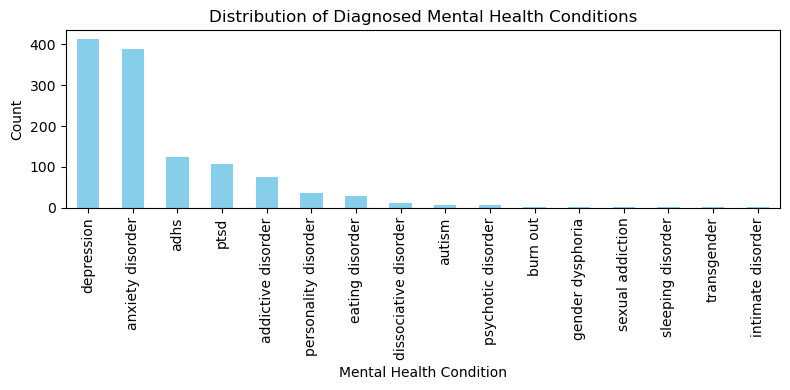

In [82]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df):
    conditions = df['Diagnosed_MH_Conditions'].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0':  # Check for non-empty and non-'0' conditions
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Count occurrences of mental health conditions
condition_counts = count_mental_health_conditions(test_df)

# Convert counts to a pandas Series for plotting
condition_counts_series = pd.Series(condition_counts)

# Sort the Series by values in descending order (optional)
condition_counts_series = condition_counts_series.sort_values(ascending=False)

# Inspect the condition counts to identify any issues
print(condition_counts)

# Create a bar chart to display the distribution of mental health conditions
plt.figure(figsize=(8, 4))
condition_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diagnosed Mental Health Conditions')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Add the new Columns to the DF

In [83]:
# Function to add BoW features to DataFrame
def add_bow_features(df, bow_features):
    # Convert bow_features set to list
    bow_features_list = list(bow_features)
    
    # Add BoW features as new columns to DataFrame
    for feature in bow_features_list:
        df[feature] = df['Diagnosed_MH_Conditions'].apply(lambda x: 1 if feature in x else 0)
    
    return df

# Use the function to add BoW features to test_df
test_df = add_bow_features(test_df, bow_result)

# Display the updated DataFrame with BoW features
test_df.head()

,Self_Employed,Num_Employees,Tech_Company_Primary,Tech_Role_Primary,MH_Benefits_Provided,MH_Options_Awareness,MH_Discussions_Formal,MH_Resources_Offered,Anonymity_Protection,Medical_Leave_Policy,...,gender dysphoria,psychotic disorder,personality disorder,transgender,depression,autism,adhs,0,ptsd,addictive disorder
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,0,0,0,0,0,0,0,1,0,0
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,0,0,0,0,1,0,0,0,0,0
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,0,0,0,0,0,0,0,1,0,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,0,0,0,0,0,0,0,0,1,0


### Column: 'Believed_MH_Conditions'

In [84]:
# Reduce the contents of the "Believed_MH_Conditions" column to the clinical pictures

test_df = renamed_df
def remove_text_in_parentheses(text):
     if isinstance(text, str):
        # Remove the text in brackes
        result = re.sub(r'\([^)]*\)', '', text) 
        # Remove obsolete spaces
        return result.strip()  
     else:
         return text

# Applying the function to the entire column 
test_df['Believed_MH_Conditions'] = test_df['Believed_MH_Conditions'].apply(remove_text_in_parentheses)


# Replace hyphens with commas

test_df['Believed_MH_Conditions'] = test_df['Believed_MH_Conditions'].str.replace(' \|', ', ', regex=True)
test_df['Believed_MH_Conditions'] = test_df['Believed_MH_Conditions'].str.replace('\|', ', ', regex=True)

#Clean up text data and convert to lower case
test_df['Believed_MH_Conditions'] = test_df['Believed_MH_Conditions'].str.lower()

# Show Dataframe
test_df['Believed_MH_Conditions'].unique()

# Replace nan-Values with empty strings
test_df['Believed_MH_Conditions'].fillna('0', inplace=True)

/var/folders/l9/1t32pl1s7bs8hwtdsvql5l0h0000gn/T/ipykernel_1761/946707916.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Believed_MH_Conditions'].fillna('0', inplace=True)


#### Identifying the Individual Believed Illnesses and Create Bag of Words

In [85]:
def bow_creator(df):
    unique_list= list(df.unique())
    split_list = [item.split(', ') if item else [] for item in unique_list]
    
    # Initialize an empty list to store the joined strings
    joined_list = []
    
    # Extend the joined_list with elements from each inner list in split_list
    for sublist in split_list:
        joined_list.extend(sublist)

    return set(joined_list)

bow_creator(test_df['Believed_MH_Conditions'])

{'0',
 'addictive disorder',
 'anxiety disorder',
 'asperger syndrome',
 "asperger's",
 'attention deficit hyperactivity disorder',
 'autism',
 'burnout',
 'depersonalisation',
 'depersonalization disorder',
 'dissociative disorder',
 'eating disorder',
 'gender identity disorder',
 'mood disorder',
 'obsessive-compulsive disorder',
 'personality disorder',
 'post-partum / anxiety',
 'post-traumatic stress disorder',
 'psychotic disorder',
 'right?!',
 'stress response syndromes',
 'substance use disorder',
 'suicidal ideation',
 'tinnitus',
 "we're all hurt"}

In [86]:
# As we have seen, several clinical pictures can be grouped together under superordinate categories and information that does not fit into any category can be removed.
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("asperger's", "autism")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("autisme", "autism")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("asperger syndrom", "autism")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("depersonalisation", "depersonalization")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("depersonalization disorder", "depersonalization")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("mood disorder", "depression")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("suicidal ideation", "depression")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("post-partum / anxiety", "anxiety disorder")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("post-traumatic stress disorder", "ptsd")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("right?!", "")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("we're all hurt", "")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("substance use disorder", "addictive disorder")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("attention deficit hyperactivity disorder", "adhs")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("autisme", "autism")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("obsessive-compulsive disorder", "anxiety disorder")
test_df.Believed_MH_Conditions = test_df.Believed_MH_Conditions.str.replace("stress response syndromes", "ptsd")


In [87]:
bow_result = bow_creator(test_df['Believed_MH_Conditions'])
bow_result.remove('')
bow_result

{'0',
 'addictive disorder',
 'adhs',
 'anxiety disorder',
 'autism',
 'burnout',
 'depersonalization',
 'depression',
 'dissociative disorder',
 'eating disorder',
 'gender identity disorder',
 'personality disorder',
 'psychotic disorder',
 'ptsd',
 'tinnitus'}

#### Visualization of Distribution of Believed Mental Health Conditions

{'addictive disorder': 40, 'anxiety disorder': 223, 'depression': 220, 'adhs': 58, 'psychotic disorder': 8, 'personality disorder': 42, 'eating disorder': 10, 'ptsd': 66, 'burnout': 1, 'gender identity disorder': 1, 'tinnitus': 1, 'dissociative disorder': 6, 'depersonalization': 2, 'autism': 3}


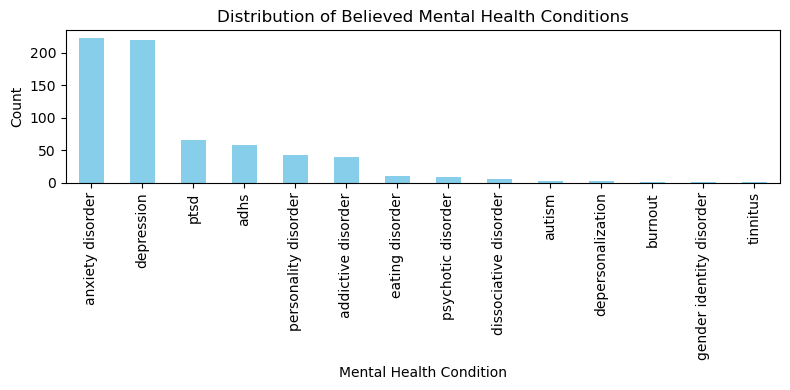

In [88]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df):
    conditions = df['Believed_MH_Conditions'].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0':  # Check for non-empty and non-'0' conditions
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Count occurrences of mental health conditions
condition_counts = count_mental_health_conditions(test_df)

# Convert counts to a pandas Series for plotting
condition_counts_series = pd.Series(condition_counts)

# Sort the Series by values in descending order (optional)
condition_counts_series = condition_counts_series.sort_values(ascending=False)

# Inspect the condition counts to identify any issues
print(condition_counts)

# Create a bar chart to display the distribution of mental health conditions
plt.figure(figsize=(8, 4))
condition_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Believed Mental Health Conditions')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#### Visualization of Differences between the Believed and Diagnosed Mental Health Conditions

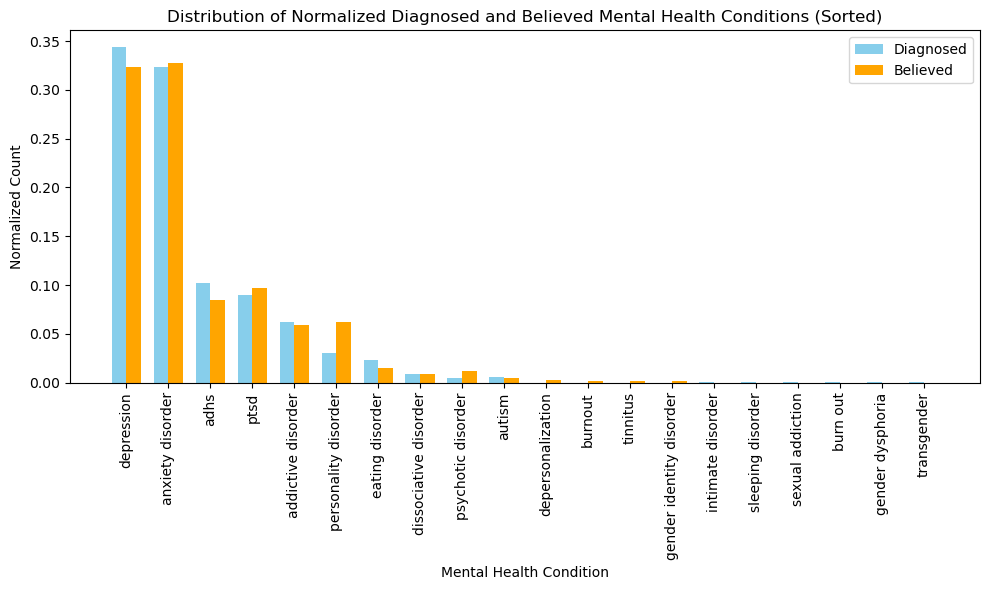

In [89]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df, column_name):
    conditions = df[column_name].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0':  
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Function to normalize condition counts
def normalize_condition_counts(counts_dict):
    total_count = sum(counts_dict.values())
    normalized_counts = {condition: count / total_count for condition, count in counts_dict.items()}
    return normalized_counts

# Count occurrences of mental health conditions for Diagnosed_MH_Conditions
diagnosed_condition_counts = count_mental_health_conditions(test_df, 'Diagnosed_MH_Conditions')

# Normalize counts for Diagnosed_MH_Conditions
diagnosed_condition_counts_normalized = normalize_condition_counts(diagnosed_condition_counts)

# Count occurrences of mental health conditions for Believed_MH_Conditions
believed_condition_counts = count_mental_health_conditions(test_df, 'Believed_MH_Conditions')

# Normalize counts for Believed_MH_Conditions
believed_condition_counts_normalized = normalize_condition_counts(believed_condition_counts)

# Get unique mental health conditions
conditions = set(diagnosed_condition_counts_normalized.keys()).union(set(believed_condition_counts_normalized.keys()))

# Create lists to hold normalized values for both diagnoses
diagnosed_normalized_values = [diagnosed_condition_counts_normalized.get(cond, 0) for cond in conditions]
believed_normalized_values = [believed_condition_counts_normalized.get(cond, 0) for cond in conditions]

# Sort conditions and corresponding values by the sum of normalized counts
sorted_conditions_values = sorted(zip(conditions, diagnosed_normalized_values, believed_normalized_values), key=lambda x: sum(x[1:]), reverse=True)
sorted_conditions, sorted_diagnosed_values, sorted_believed_values = zip(*sorted_conditions_values)

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ind = np.arange(len(sorted_conditions))  # the x locations for the groups
width = 0.35  # the width of the bars

# Plot the bars for Diagnosed
plt.bar(ind, sorted_diagnosed_values, width, label='Diagnosed', color='skyblue')

# Plot the bars for Believed next to Diagnosed
plt.bar(ind + width, sorted_believed_values, width, label='Believed', color='orange')

# Add labels, title, and legend
plt.xlabel('Mental Health Condition')
plt.ylabel('Normalized Count')
plt.title('Distribution of Normalized Diagnosed and Believed Mental Health Conditions (Sorted)')
plt.xticks(ind + width / 2, sorted_conditions, rotation=90)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

In [90]:
# As we can see here, the distributions of Diagnosed and Believed Mental Health Conditions are very similar. 
# As it would go beyond the scope of this article to insert the believed mental health conditions into the df as separate columns with a bag of words, I will drop the column here.
test_df = test_df.drop("Believed_MH_Conditions", axis=1)

### Column: 'Diagnosed_MH_Conditions_List'

In [91]:
# Reduce the contents of the "Diagnosed_MH_Conditions" column to the clinical pictures

test_df = renamed_df
def remove_text_in_parentheses(text):
     if isinstance(text, str):
        # Remove the text in brackes
        result = re.sub(r'\([^)]*\)', '', text) 
        # Remove obsolete spaces
        return result.strip()  
     else:
         return text
     
#  Applying the function to the entire column 
test_df['Diagnosed_MH_Conditions_List'] = test_df['Diagnosed_MH_Conditions_List'].apply(remove_text_in_parentheses)


# Replace hyphens with commas

test_df['Diagnosed_MH_Conditions_List'] = test_df['Diagnosed_MH_Conditions_List'].str.replace(' \|', ', ', regex=True)
test_df['Diagnosed_MH_Conditions_List'] = test_df['Diagnosed_MH_Conditions_List'].str.replace('\|', ', ', regex=True)

# Clean up text data and convert to lower case
test_df['Diagnosed_MH_Conditions_List'] = test_df['Diagnosed_MH_Conditions_List'].str.lower()

# Show Dataframe
test_df['Diagnosed_MH_Conditions_List'].unique()

# Replace Nan Values with empty strings
test_df['Diagnosed_MH_Conditions_List'].fillna('0', inplace=True)

/var/folders/l9/1t32pl1s7bs8hwtdsvql5l0h0000gn/T/ipykernel_1761/2492012445.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Diagnosed_MH_Conditions_List'].fillna('0', inplace=True)


#### Identifying the Individual Diagnosed Illnesses and Create Bag of Words

In [92]:
def bow_creator(df):
    unique_list= list(df.unique())
    split_list = [item.split(', ') if item else [] for item in unique_list]
    
    # Initialize an empty list to store the joined strings
    joined_list = []
   
    # Extend the joined_list with elements from each inner list in split_list
    for sublist in split_list:
        joined_list.extend(sublist)

    return set(joined_list)

bow_creator(test_df['Diagnosed_MH_Conditions_List'])


{'0',
 'add',
 'addictive disorder',
 'anxiety disorder',
 'asperger syndrome',
 'aspergers',
 'attention deficit disorder',
 'attention deficit hyperactivity disorder',
 'autism',
 'autism - while not a "mental illness"',
 'autism spectrum disorder',
 'burn out',
 'depression',
 'dissociative disorder',
 'eating disorder',
 'gender dysphoria',
 'gender identity disorder',
 'intimate disorder',
 'mcd',
 'mood disorder',
 'obsessive-compulsive disorder',
 'pdd-nos',
 'personality disorder',
 'post-traumatic stress disorder',
 'posttraumatic stress disourder',
 'psychotic disorder',
 'schizotypal personality disorder',
 'seasonal affective disorder',
 'still greatly affects how i handle anxiety',
 'stress response syndromes',
 'substance use disorder',
 'suicidal ideation'}

In [93]:
#As we have seen, several clinical pictures can be grouped together under superordinate categories and information that does not fit into any category can be removed.
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("asperger syndrome", "autism")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("aspergers", "autism")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("autism spectrum disorder", "autism")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("post-traumatic stress disorder", "ptsd")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("posttraumatic stress disourder", "ptsd")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("substance use disorder", "addictive disorder")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("addiction disorder", "addictive disorder")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("mcd", "depression")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("seasonal affective disorder", "depression")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("attention deficit disorder", "adhs")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace("attention deficit hyperactivity disorder", "adhs")
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('autism - while not a "mental illness"', 'autism')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('pdd-nos', 'autism')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace(r'\badd\b', 'addictive disorder', regex=True)
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('schizotypal personality disorder', 'personality disorder')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('still greatly affects how i handle anxiety', '')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('mood disorder', 'depression')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('obsessive-compulsive disorder', 'anxiety disorder')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('stress response syndromes', 'ptsd')
test_df.Diagnosed_MH_Conditions_List = test_df.Diagnosed_MH_Conditions_List.str.replace('suicidal ideation', 'depression')

In [94]:
bow_result = bow_creator(test_df['Diagnosed_MH_Conditions_List'])
bow_result

{'',
 '0',
 'addictive disorder',
 'adhs',
 'anxiety disorder',
 'autism',
 'burn out',
 'depression',
 'dissociative disorder',
 'eating disorder',
 'gender dysphoria',
 'gender identity disorder',
 'intimate disorder',
 'personality disorder',
 'psychotic disorder',
 'ptsd'}

#### Visualization of the Distribution of Diagnosed Menthal Health Issues

{'anxiety disorder': 413, 'depression': 532, 'addictive disorder': 42, 'personality disorder': 29, 'adhs': 136, 'ptsd': 102, 'eating disorder': 18, 'autism': 10, 'burn out': 1, 'dissociative disorder': 10, 'gender identity disorder': 1, 'gender dysphoria': 1, 'psychotic disorder': 8, 'intimate disorder': 1}


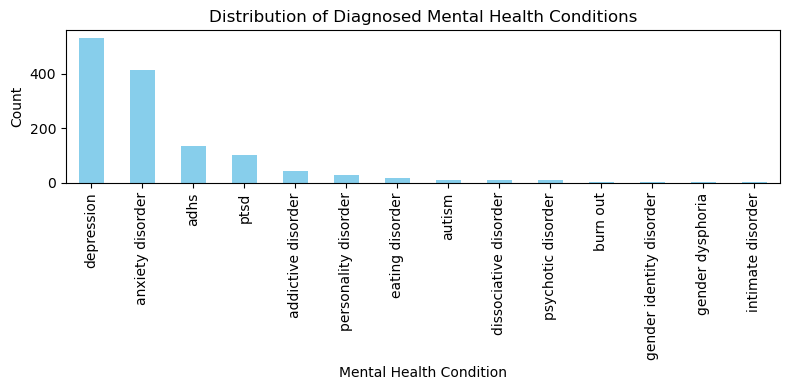

In [95]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df, column_name):
    conditions = df[column_name].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0':  # Check for non-empty and non-'0' conditions
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Count occurrences of mental health conditions
condition_counts = count_mental_health_conditions(test_df, 'Diagnosed_MH_Conditions_List')

# Convert counts to a pandas Series for plotting
condition_counts_series = pd.Series(condition_counts)

# Sort the Series by values in descending order (optional)
condition_counts_series = condition_counts_series.sort_values(ascending=False)

# Inspect the condition counts to identify any issues
print(condition_counts)

# Create a bar chart to display the distribution of mental health conditions
plt.figure(figsize=(8, 4))
condition_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diagnosed Mental Health Conditions')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#### Visualization of Distributions of the colums Diagnosed_MH_Conditions and Diagnosed_MH_Conditions_List

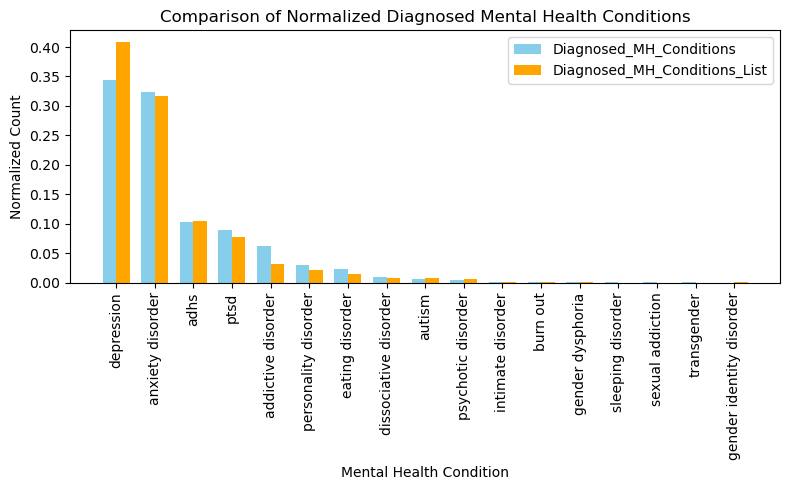

In [96]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df, column_name):
    conditions = df[column_name].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0': 
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Function to normalize condition counts
def normalize_condition_counts(counts_dict):
    total_count = sum(counts_dict.values())
    normalized_counts = {condition: count / total_count for condition, count in counts_dict.items()}
    return normalized_counts

# Count occurrences of mental health conditions for 'Diagnosed_MH_Conditions'
diagnosed_condition_counts = count_mental_health_conditions(test_df, 'Diagnosed_MH_Conditions')

# Normalize counts for 'Diagnosed_MH_Conditions'
diagnosed_condition_counts_normalized = normalize_condition_counts(diagnosed_condition_counts)

# Count occurrences of mental health conditions for 'Diagnosed_MH_Conditions_List'
diagnosed_condition_counts_list = count_mental_health_conditions(test_df, 'Diagnosed_MH_Conditions_List')

# Normalize counts for 'Diagnosed_MH_Conditions_List'
diagnosed_condition_counts_list_normalized = normalize_condition_counts(diagnosed_condition_counts_list)

# Get unique mental health conditions from both columns
conditions = set(diagnosed_condition_counts_normalized.keys()).union(set(diagnosed_condition_counts_list_normalized.keys()))

# Create lists to hold normalized values for both diagnoses
diagnosed_normalized_values = [diagnosed_condition_counts_normalized.get(cond, 0) for cond in conditions]
diagnosed_list_normalized_values = [diagnosed_condition_counts_list_normalized.get(cond, 0) for cond in conditions]

# Sort conditions and corresponding values by the sum of normalized counts
sorted_conditions_values = sorted(zip(conditions, diagnosed_normalized_values, diagnosed_list_normalized_values), key=lambda x: sum(x[1:]), reverse=True)
sorted_conditions, sorted_diagnosed_values, sorted_diagnosed_list_values = zip(*sorted_conditions_values)

# Set up the figure and axis
plt.figure(figsize=(8, 5))
ind = np.arange(len(sorted_conditions)) 
width = 0.35  

# Plot bars for 'Diagnosed_MH_Conditions' and 'Diagnosed_MH_Conditions_List'
plt.bar(ind, sorted_diagnosed_values, width, label='Diagnosed_MH_Conditions', color='skyblue')
plt.bar(ind + width, sorted_diagnosed_list_values, width, label='Diagnosed_MH_Conditions_List', color='orange')

# Add labels, title, and legend
plt.xlabel('Mental Health Condition')
plt.ylabel('Normalized Count')
plt.title('Comparison of Normalized Diagnosed Mental Health Conditions')
plt.xticks(ind + width / 2, sorted_conditions, rotation=90)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
# Since the distributions of these columns are also very similar, I will also drop the "Diagnosed_MH_Conditions_List" column.
test_df = test_df.drop("Diagnosed_MH_Conditions_List", axis=1)

### Column: 'Gender'

In [98]:
test_df.Gender.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [99]:
# As we can see, the respondents gave a wide variety of names for their gender identity. 
# In order to simplify the subsequent analysis, we have grouped these into categories

gender_mapping = {
    'Male': 'male',
    'Male ': 'male',
    'M': 'male',
    'male': 'male',
    'male ': 'male',
    'm': 'male',
    'cis male': 'male',
    'man': 'male',
    'mail': 'male',
    'male/genderqueer': 'male',
    'male.': 'male',
    'male (cis)': 'male',
    'malean': 'male',
    'Sex is male': 'male',
    'none of your business': 'nonbinary', 
    'fm': 'female',
    'female': 'female',
    'Female': 'female',
    'female ': 'female',
    'f': 'female',
    'F': 'female',
    'Cis female': 'female',
    'Cis female ' : 'female',
    'Woman': 'female',
    'woman': 'female',
    'Female assigned at birth ': 'female',
    'Female or maleulti-Gender Femme': 'female',
    'Female (props for making this a freeform field, though)': 'female',
    ' Female': 'female',
    'Other/Transfeminine': 'nonbinary',
    'Transitioned, male2F': 'transgender',
    'Genderfluid (born female)': 'nonbinary',
    'genderqueer woman': 'female',
    'trans woman': 'transgender',
    'Unicorn': 'nonbinary',
    'Bigender': 'nonbinary',
    'non-binary': 'nonbinary',
    'nb masculine': 'nonbinary',
    'Enby': 'nonbinary',
    'Genderqueer': 'nonbinary',
    'genderqueer': 'nonbinary',
    'Androgynous': 'nonbinary',
    'Agender': 'nonbinary',
    'Queer': 'nonbinary',
    'Fluid': 'nonbinary',
    'Other': 'nonbinary',
    'Human': 'nonbinary',
    'cisdude': 'male',
    'Genderflux demi-girl': 'female',
    'female-bodied; no feelings about gender': 'female',
    'cis man': 'male',
    'AFAB': 'nonbinary',
    'Cis-woman': 'female',
    'mtf': 'transgender',
    'mtf': 'transgender',
    'male (trans, Ftmale)': 'transgender',
    'male 9:1 female, roughly': 'nonbinary',
    'maleale': 'male',
    'maleALE': 'male',
    'I identify as female.': 'female',
    'Transitioned, M2F': 'transgender',
    'Female or Multi-Gender Femme': 'female',
    'Female ': 'female',
    'female/woman': 'female',
    'Cis male': 'male',
    'Male.': 'male',
    'Male (cis)': 'male',
    'Cisgender Female': 'female',
    'Man': 'male',
    'Genderfluid': 'nonbinary',
    'Malr': 'male',
    'Dude': 'male',
    'M|': 'male',
    'Male/genderqueer': 'male',
    'fem': 'female',
    'human': 'nonbinary',
    'Cis Male': 'male',
    'Male (trans, FtM)': 'transgender',
    'Transgender_woman': 'transgender',
    'Nonbinary': 'nonbinary',
    'MALE': 'male',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? " : 'male',
    'non_binary': 'nonbinary',
    'Transgender woman': 'transgender'
}

# Replace values in the 'Gender' column using the mapping dictionary
test_df['Gender'] = test_df['Gender'].replace(gender_mapping)

# Replace NaN values in the 'Gender' column with 'not_specified'
test_df['Gender'] = test_df['Gender'].fillna('not specified')

test_df.Gender.unique()

array(['male', 'female', 'nonbinary', 'transgender', 'not specified'],
      dtype=object)

#### Visualization Gender Distribution

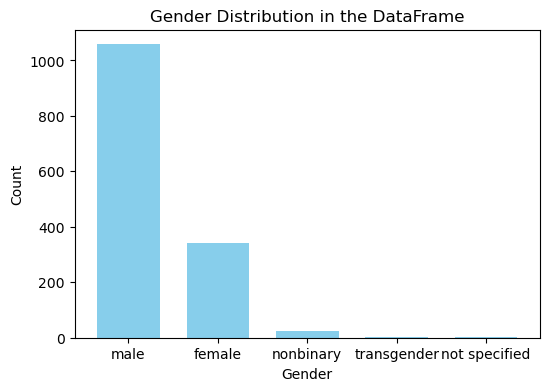

In [100]:
# Display the gender distribution
gender_distribution = test_df['Gender'].value_counts()
# Create a bar chart
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color='skyblue', width=0.7)
plt.title('Gender Distribution in the DataFrame')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### Visualization of Diagnosed Mental Health Conditions: Comparison Male and Female

In [101]:
df_male = test_df.query("Gender == 'male'")
df_female = test_df.query("Gender == 'female'")
df_transgender = test_df.query("Gender == 'transgender'")
df_nonbinary = test_df.query("Gender == 'nonbinary'")
print(f"The comparison between men and women is particularly interesting here, as there are only {len(df_transgender)} transgender and {len(df_nonbinary)} nonbinary persons")

The comparison between men and women is particularly interesting here, as there are only 4 transgender and 26 nonbinary persons


<Figure size 3000x2000 with 0 Axes>

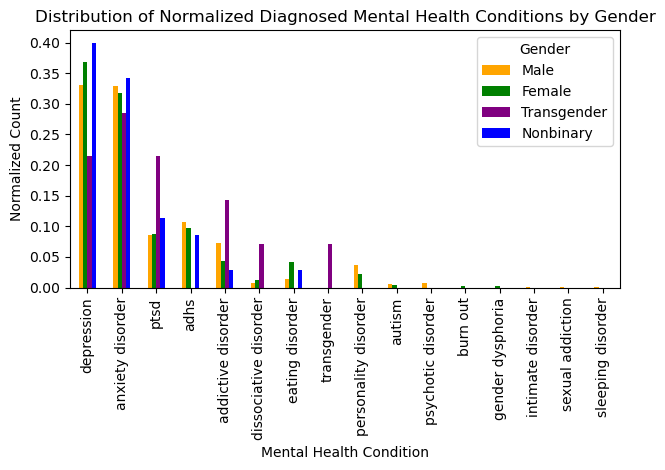

In [102]:
# Function to process and count mental health conditions
def count_mental_health_conditions(df):
    conditions = df['Diagnosed_MH_Conditions'].str.split(', ')
    condition_counts = {}
    
    for entry in conditions:
        if isinstance(entry, list):
            for condition in entry:
                if condition.strip() and condition != '0':  
                    if condition in condition_counts:
                        condition_counts[condition] += 1
                    else:
                        condition_counts[condition] = 1
    
    return condition_counts

# Count occurrences of mental health conditions for each gender
condition_counts_male = count_mental_health_conditions(df_male)
condition_counts_female = count_mental_health_conditions(df_female)
condition_counts_transgender = count_mental_health_conditions(df_transgender)
condition_counts_nonbinary = count_mental_health_conditions(df_nonbinary)

# Create pandas Series from the condition counts
condition_counts_male_series = pd.Series(condition_counts_male)
condition_counts_female_series = pd.Series(condition_counts_female)
condition_counts_transgender_series = pd.Series(condition_counts_transgender)
condition_counts_nonbinary_series = pd.Series(condition_counts_nonbinary)

# Normalize the condition counts for each gender
condition_counts_male_series_normalized = condition_counts_male_series / sum(condition_counts_male_series)
condition_counts_female_series_normalized = condition_counts_female_series / sum(condition_counts_female_series)
condition_counts_transgender_series_normalized = condition_counts_transgender_series / sum(condition_counts_transgender_series)
condition_counts_nonbinary_series_normalized = condition_counts_nonbinary_series / sum(condition_counts_nonbinary_series)

# Combine male and female condition counts into a DataFrame for plotting
combined_counts_df = pd.DataFrame({
    'Male': condition_counts_male_series_normalized,
    'Female': condition_counts_female_series_normalized,
    'Transgender': condition_counts_transgender_series_normalized,
    'Nonbinary': condition_counts_nonbinary_series_normalized
}).fillna(0) 

# Sort the combined DataFrame by the total normalized counts across all genders (optional)
combined_counts_df['Total'] = combined_counts_df.sum(axis=1)
combined_counts_df = combined_counts_df.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Plot grouped bar chart for mental health condition counts by gender
plt.figure(figsize=(30, 20))
combined_counts_df.plot(kind='bar', color=['orange', 'green', 'purple', 'blue'])
plt.title('Distribution of Normalized Diagnosed Mental Health Conditions by Gender')
plt.xlabel('Mental Health Condition')
plt.ylabel('Normalized Count')
plt.xticks(rotation=90)  
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

In [103]:

# After we have already extracted the contents of the Diagnosed_MH_Conditions column using Bag of Words, we can also delete this column
test_df = test_df.drop("Diagnosed_MH_Conditions", axis=1)

### Column: Age

In [104]:
test_df.Age.unique()


array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70])

In [105]:
# Replace specific values with NaN
test_df.loc[test_df['Age'].isin([323, 17, 3, 15, 17]), 'Age'] = pd.NA

# Calculate the rounded mean of the "Age" column, ignoring NaN values
mean_age = round(test_df['Age'].mean())

# Create a mask for NaN values in the "Age" column
nan_mask = test_df['Age'].isna()

# Replace NaN values with the rounded mean using the mask
test_df.loc[nan_mask, 'Age'] = mean_age
test_df.Age.unique()


array([39., 29., 38., 43., 42., 30., 37., 44., 28., 34., 35., 52., 32.,
       25., 31., 26., 33., 27., 36., 40., 46., 41., 45., 19., 21., 24.,
       23., 22., 51., 48., 55., 50., 49., 20., 54., 47., 56., 57., 63.,
       99., 61., 62., 53., 58., 66., 59., 65., 74., 70.])

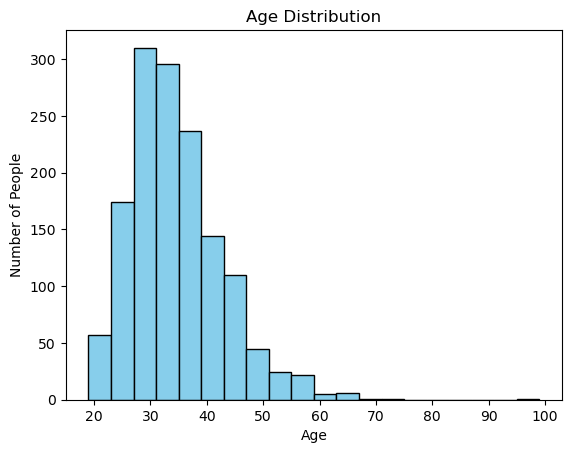

In [106]:
ages = test_df['Age']

# Creating a histogram to visualize the age distribution
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')

# Displaying the histogram
plt.show()

### Column: 'Reasons_Not_Discuss_MH_Interview'

In [107]:
test_df.Reasons_Not_Discuss_MH_Interview.nunique()

1080

In [108]:
# As there are 1080 different answers with a lot of text, i will drop this column
test_df = test_df.drop("Reasons_Not_Discuss_MH_Interview", axis=1)

### Column Reasons_Not_Discuss_Physical_Health_Interview

In [109]:
# As there are 1085 different answers with a lot of text, i will drop this column
test_df.Reasons_Not_Discuss_Physical_Health_Interview.nunique()

1085

In [110]:
test_df = test_df.drop("Reasons_Not_Discuss_Physical_Health_Interview", axis=1)

### Column: ' Work_Position_Description'


In [111]:
# As there are 264 diffent work positions, we summarize them in superordinate categories
test_df.Work_Position_Description.nunique()

264

In [112]:
# Mapping of job categories to their broader categories
job_category_mapping = {
    'Back-end Developer': 'Developer',
    'Front-end Developer': 'Developer',
    'Supervisor/Team Lead': 'Management',
    'Executive Leadership': 'Management',
    'DevOps/SysAdmin': 'Technical Operations',
    'Support': 'Customer Support',
    'Dev Evangelist/Advocate': 'Technical Operations',
    'Designer': 'Design',
    'One-person shop': 'Freelancer',
    'HR': 'Human Resources',
    'Sales': 'Sales',
    'Other': 'Other'
}

# Update job categories directly in the column
for i in range(len(test_df)):
    job_description = test_df.loc[i, 'Work_Position_Description']
    primary_job = job_description.split('|')[0]  
    if primary_job in job_category_mapping:
        test_df.loc[i, 'Work_Position_Description'] = job_category_mapping[primary_job]
    else:
        test_df.loc[i, 'Work_Position_Description'] = 'Other'  

# Output unique values of the updated column
unique_job_categories = test_df['Work_Position_Description'].unique()
print(unique_job_categories)


['Developer' 'Management' 'Technical Operations' 'Customer Support'
 'Freelancer' 'Design' 'Other' 'Human Resources' 'Sales']


#### Visualization of Distribution of Work_Position_Descriptions

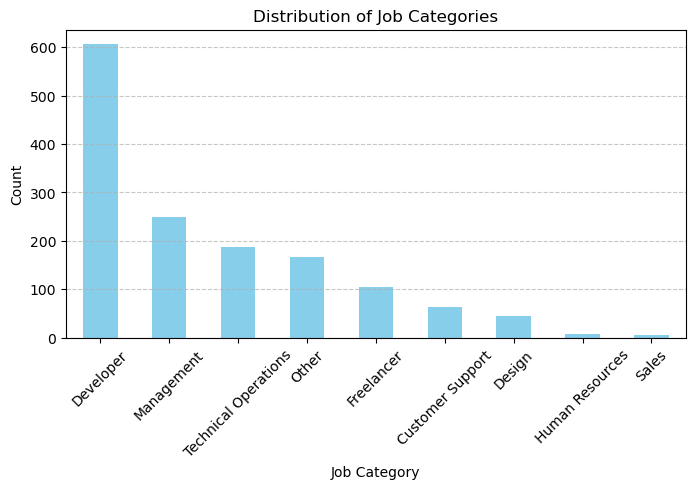

In [113]:
# Plotting the distribution of job categories using a bar chart
category_counts = test_df['Work_Position_Description'].value_counts()

plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Column Country_Work

In [114]:
test_df.Country_Work.unique()

array(['United Kingdom', 'United States of America', 'Canada', 'Germany',
       'Netherlands', 'Czech Republic', 'Lithuania', 'Australia',
       'France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'United Arab Emirates',
       'Mexico', 'Switzerland', 'Norway', 'Argentina', 'Ireland', 'Italy',
       'Finland', 'Turkey', 'Colombia', 'Costa Rica', 'Vietnam',
       'Bulgaria', 'New Zealand', 'South Africa', 'Slovakia', 'Austria',
       'Bangladesh', 'Pakistan', 'Afghanistan', 'Greece', 'Other',
       'Romania', 'Brunei', 'Iran', 'Hungary', 'Israel', 'Japan',
       'Ecuador', 'Bosnia and Herzegovina', 'China', 'Chile', 'Guatemala',
       'Serbia', 'Estonia'], dtype=object)

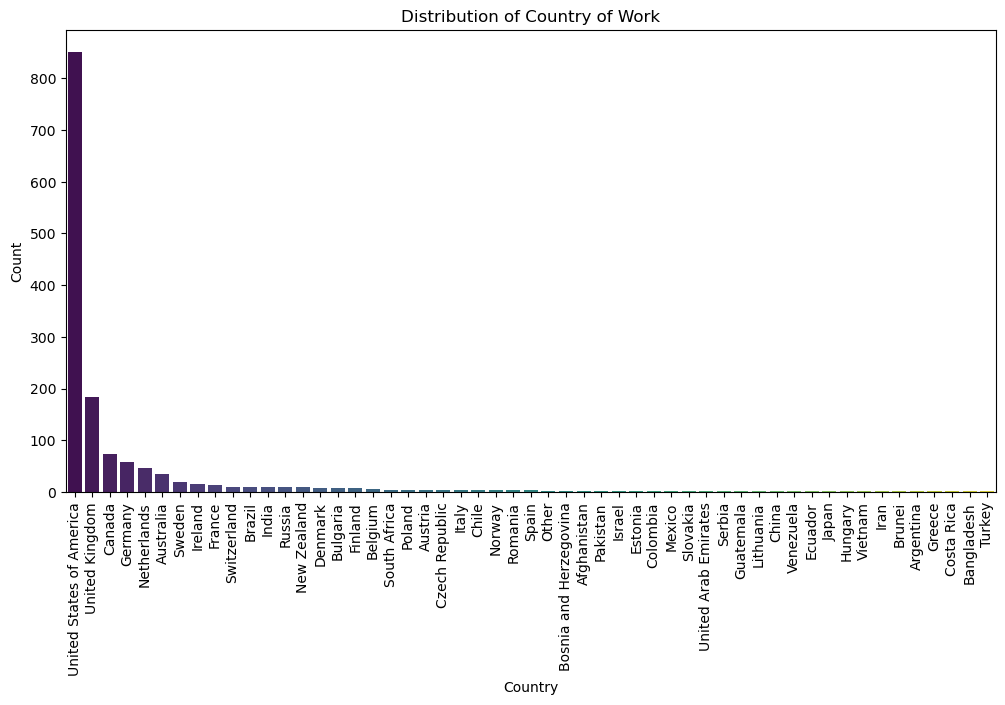

In [115]:
# Filter out NaN values and get unique country counts for Country_Residence
country_residence_counts = test_df['Country_Work'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_residence_counts.index, y=country_residence_counts.values, palette='viridis')
plt.title('Distribution of Country of Work')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

#### Comparison of Country of Residence and Country of Work

<Figure size 4500x3500 with 0 Axes>

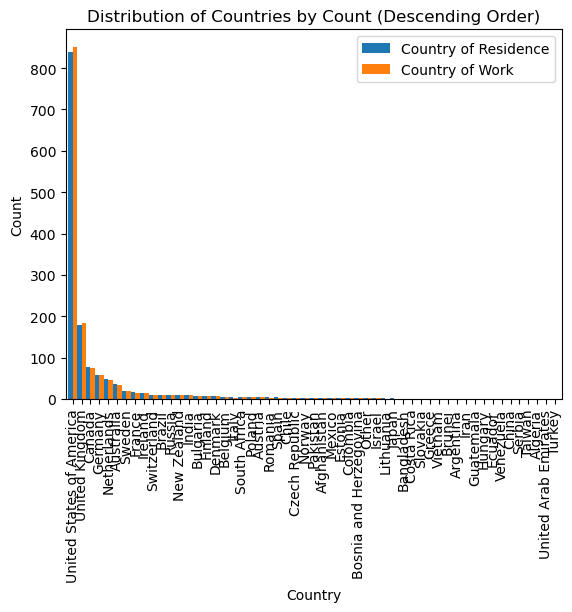

In [116]:
# Get the counts of unique countries in 'Country_Residence' column
residence_counts = test_df['Country_Residence'].value_counts()

# Get the counts of unique countries in 'Country_Work' column
work_counts = test_df['Country_Work'].value_counts()

# Combine the counts from both columns
combined_counts = pd.concat([residence_counts, work_counts], axis=1, keys=['Residence', 'Work']).fillna(0)

# Calculate total counts for sorting
combined_counts['Total'] = combined_counts.sum(axis=1)

# Sort the combined counts by total in descending order
sorted_counts = combined_counts.sort_values(by='Total', ascending=False)

# Plotting the counts
plt.figure(figsize=(45, 35)) 
sorted_counts[['Residence', 'Work']].plot(kind='bar', width=1)
plt.title('Distribution of Countries by Count (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(['Country of Residence', 'Country of Work'])
plt.show()

In [117]:
# So as the distributions are pretty similar, i decided to drop the "Country_Work"
test_df = test_df.drop('Country_Work', axis=1)

### Column Country_Residence	

In [118]:
test_df.Country_Residence.unique()

array(['United Kingdom', 'United States of America', 'Canada', 'Germany',
       'Netherlands', 'Czech Republic', 'Lithuania', 'Australia',
       'France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'Mexico', 'Switzerland',
       'Norway', 'Argentina', 'Ireland', 'Italy', 'Finland', 'Colombia',
       'Costa Rica', 'Vietnam', 'Bulgaria', 'New Zealand', 'South Africa',
       'Slovakia', 'Austria', 'Bangladesh', 'Algeria', 'Pakistan',
       'Afghanistan', 'Greece', 'Romania', 'Other', 'Brunei', 'Japan',
       'Iran', 'Hungary', 'Israel', 'Ecuador', 'Bosnia and Herzegovina',
       'China', 'Chile', 'Guatemala', 'Taiwan', 'Serbia', 'Estonia'],
      dtype=object)

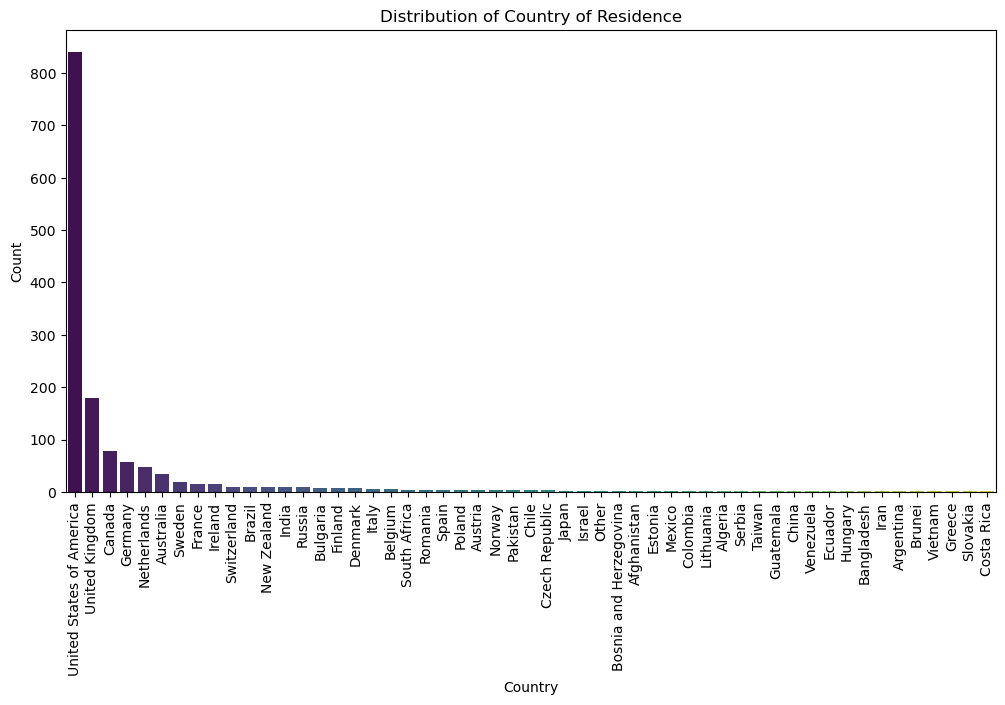

In [119]:
# Filter out NaN values and get unique country counts
country_counts = test_df['Country_Residence'].value_counts()

# Plotting the distribution of unique countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Distribution of Country of Residence')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

### Create a Continent Mapping for the Countries

In [120]:
country_to_continent_mapping = {
    'United Kingdom': 'Europe',
    'United States of America': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Netherlands': 'Europe',
    'Czech Republic': 'Europe',
    'Lithuania': 'Europe',
    'Australia': 'Australia',
    'France': 'Europe',
    'Venezuela': 'South America',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Denmark': 'Europe',
    'Sweden': 'Europe',
    'Russia': 'Europe/Asia',
    'Spain': 'Europe',
    'India': 'Asia',
    'Mexico': 'North America',
    'Switzerland': 'Europe',
    'Norway': 'Europe',
    'Argentina': 'South America',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Finland': 'Europe',
    'Colombia': 'South America',
    'Costa Rica': 'North America',
    'Vietnam': 'Asia',
    'Bulgaria': 'Europe',
    'New Zealand': 'Australia',
    'South Africa': 'Africa',
    'Slovakia': 'Europe',
    'Austria': 'Europe',
    'Bangladesh': 'Asia',
    'Algeria': 'Africa',
    'Pakistan': 'Asia',
    'Afghanistan': 'Asia',
    'Greece': 'Europe',
    'Romania': 'Europe',
    'Brunei': 'Asia',
    'Japan': 'Asia',
    'Iran': 'Asia',
    'Hungary': 'Europe',
    'Israel': 'Asia',
    'Ecuador': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'China': 'Asia',
    'Chile': 'South America',
    'Guatemala': 'North America',
    'Taiwan': 'Asia',
    'Serbia': 'Europe',
    'Estonia': 'Europe'
}
# Create a new column 'Continent_Residence' based on the mapping
test_df['Continent_Residence'] = test_df['Country_Residence'].map(country_to_continent_mapping)

# Remove the 'Country_Residence' column
test_df.drop(columns=['Country_Residence'], inplace=True)

### Visualizaton of Continent Distribution

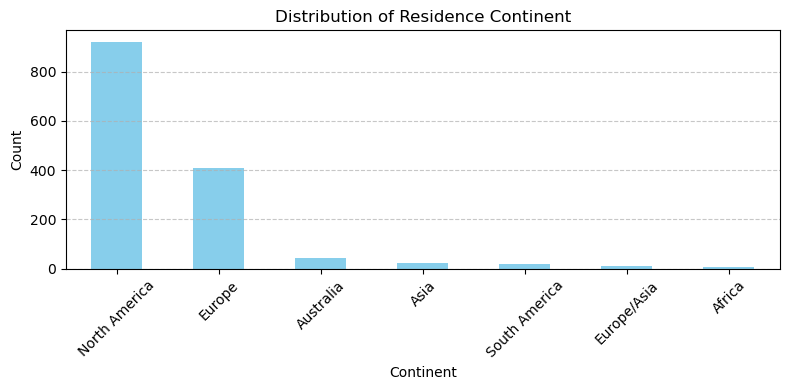

In [121]:
# Count the number of entries for each continent
continent_counts = test_df['Continent_Residence'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 4))
continent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Residence Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Dealing with the other columns

### Heatmap of the NaN-values in the df

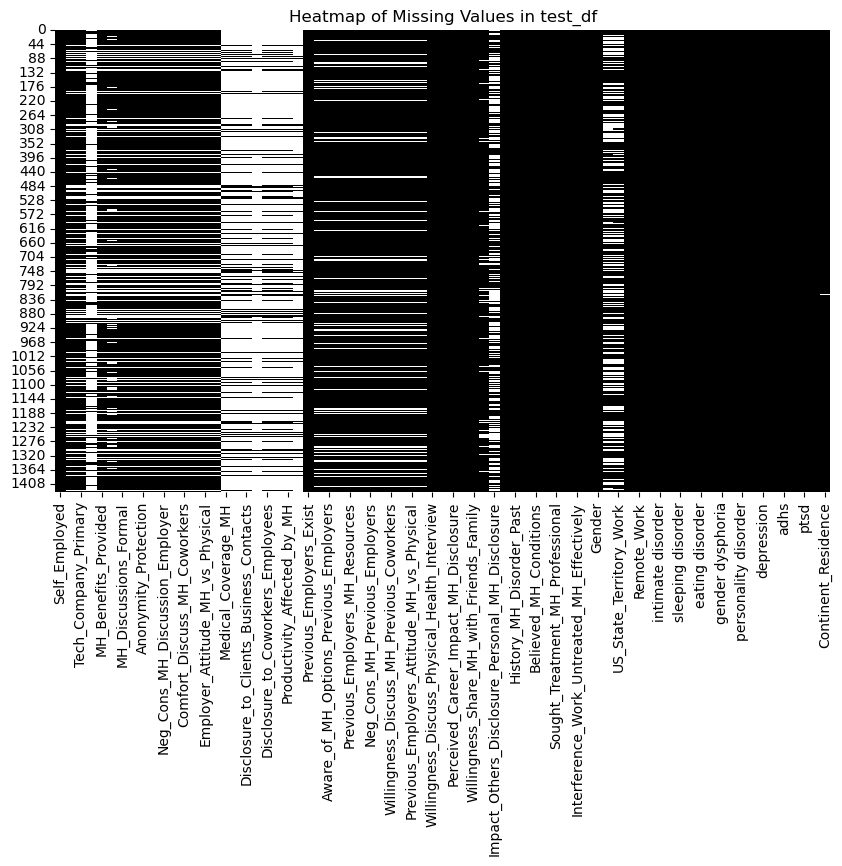

In [122]:
# Create a heatmap of missing values in the DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isna(), cmap='Greys_r', cbar=False)
plt.title('Heatmap of Missing Values in test_df')
plt.show()

### Finding all columns, that contain more than 10% nan-values and deleting them

In [123]:
# Calculate the percentage of NaN values in each column
nan_percentages = test_df.isna().mean() * 100

# Filter columns where NaN percentage is greater than 10%
columns_with_high_nan = nan_percentages[nan_percentages > 10]

# Display columns with more than 10% NaN values
print("Columns with more than 10% NaN values:")
for col, nan_percentage in columns_with_high_nan.items():
    print(f"Column '{col}': {nan_percentage:.2f}% NaN values")

Columns with more than 10% NaN values:
Column 'Num_Employees': 20.03% NaN values
Column 'Tech_Company_Primary': 20.03% NaN values
Column 'Tech_Role_Primary': 81.65% NaN values
Column 'MH_Benefits_Provided': 20.03% NaN values
Column 'MH_Options_Awareness': 29.31% NaN values
Column 'MH_Discussions_Formal': 20.03% NaN values
Column 'MH_Resources_Offered': 20.03% NaN values
Column 'Anonymity_Protection': 20.03% NaN values
Column 'Medical_Leave_Policy': 20.03% NaN values
Column 'Neg_Cons_MH_Discussion_Employer': 20.03% NaN values
Column 'Neg_Cons_Physical_Discussion_Employer': 20.03% NaN values
Column 'Comfort_Discuss_MH_Coworkers': 20.03% NaN values
Column 'Comfort_Discuss_MH_Supervisors': 20.03% NaN values
Column 'Employer_Attitude_MH_vs_Physical': 20.03% NaN values
Column 'Observed_Neg_Cons_Coworkers_MH': 20.03% NaN values
Column 'Medical_Coverage_MH': 79.97% NaN values
Column 'Local_Online_MH_Resources_Awareness': 79.97% NaN values
Column 'Disclosure_to_Clients_Business_Contacts': 79.97

In [124]:
# Filter columns where NaN percentage is greater than 10%
columns_to_drop = nan_percentages[nan_percentages > 10].index

# Drop columns with more than 25% NaN values
test_df = test_df.drop(columns=columns_to_drop)

# Now 'test_df' contains only the columns with less than or equal to 10% NaN values

In [125]:
# Display all columns of the DataFrame
test_df = test_df.drop('Believed_MH_Conditions', axis=1)
print(test_df.columns)


Index(['Self_Employed', 'Previous_Employers_Exist',
       'Willingness_Discuss_Physical_Health_Interview',
       'Willingness_Discuss_MH_Interview',
       'Perceived_Career_Impact_MH_Disclosure', 'CoWorkers_View_If_Aware_MH',
       'Willingness_Share_MH_with_Friends_Family',
       'Unsupportive_Response_MH_Workplace', 'Family_History_Mental_Illness',
       'History_MH_Disorder_Past', 'Current_MH_Disorder',
       'Diagnosed_MH_Condition_by_Professional',
       'Sought_Treatment_MH_Professional',
       'Interference_Work_Treated_MH_Effectively',
       'Interference_Work_Untreated_MH_Effectively', 'Age', 'Gender',
       'Work_Position_Description', 'Remote_Work', 'sexual addiction',
       'intimate disorder', 'anxiety disorder', 'sleeping disorder',
       'burn out', 'eating disorder', 'dissociative disorder',
       'gender dysphoria', 'psychotic disorder', 'personality disorder',
       'transgender', 'depression', 'autism', 'adhs', '0', 'ptsd',
       'addictive disorder',

In [126]:
# safe the changes into a new file
csv_filepath_test_df = '../data/interim/test_df.csv'
test_df.to_csv(csv_filepath_test_df, index=False)

# Feature Cleaning (Dealing with the missing values in the dataframe)

In [127]:
# Replace missing values with the mode in each column
# Imputing the missing values in the df 
final_df_wo_nan = test_df.fillna(test_df.mode().iloc[0])
final_df_wo_nan.head()

,Self_Employed,Previous_Employers_Exist,Willingness_Discuss_Physical_Health_Interview,Willingness_Discuss_MH_Interview,Perceived_Career_Impact_MH_Disclosure,CoWorkers_View_If_Aware_MH,Willingness_Share_MH_with_Friends_Family,Unsupportive_Response_MH_Workplace,Family_History_Mental_Illness,History_MH_Disorder_Past,...,psychotic disorder,personality disorder,transgender,depression,autism,adhs,0,ptsd,addictive disorder,Continent_Residence
0,0,1,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,No,Yes,...,0,0,0,0,0,0,1,0,0,Europe
1,0,1,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,Yes,Yes,...,0,0,0,1,0,0,0,0,0,North America
2,0,1,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,No,Maybe,...,0,0,0,0,0,0,1,0,0,Europe
3,1,1,Yes,Maybe,"Yes, I think it would",Maybe,Neutral,No,No,Yes,...,0,0,0,1,0,0,0,0,0,Europe
4,0,1,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,...,0,0,0,0,0,0,0,1,0,North America


In [128]:
# Count the total number of NaNs in the DataFrame
total_nan_count = final_df_wo_nan.isna().sum().sum()

# Print the total number of NaNs
print("Total number of NaNs in the DataFrame:", total_nan_count)

Total number of NaNs in the DataFrame: 0


In [129]:
# Safing the df to a new csv file
csv_filepath_final_df_wo_nan = '../data/interim/final_df_wo_nan.csv'
final_df_wo_nan.to_csv(csv_filepath_final_df_wo_nan, index=False)

# Gower Distance

In [130]:
cat_list = list(final_df_wo_nan.columns)
true_list = [True] * len(cat_list)
true_list[cat_list.index('Age')] = False
df_gower = gower.gower_matrix(final_df_wo_nan, cat_features=true_list)
df_gower 

array([[0.        , 0.3277027 , 0.21655406, ..., 0.24763514, 0.40844595,
        0.41013515],
       [0.3277027 , 0.        , 0.43547297, ..., 0.19695947, 0.24358109,
        0.32567567],
       [0.21655406, 0.43547297, 0.        , ..., 0.35608107, 0.5162162 ,
        0.49087837],
       ...,
       [0.24763514, 0.19695947, 0.35608107, ..., 0.        , 0.35878378,
        0.41452703],
       [0.40844595, 0.24358109, 0.5162162 , ..., 0.35878378, 0.        ,
        0.2989865 ],
       [0.41013515, 0.32567567, 0.49087837, ..., 0.41452703, 0.2989865 ,
        0.        ]], dtype=float32)

## Safe the df_gower as new csv-file

In [131]:
#Convert the NumPy array to a pandas DataFrame
df_gower_df = pd.DataFrame(df_gower)

# Save the DataFrame to a CSV file
csv_filepath_gower = '../data/interim/gower.csv'
df_gower_df.to_csv(csv_filepath_gower, index=False)

# One Hot Encoding

In [132]:
# Identifying the categorial variables that need to be encoded
categorical_columns = ['Self_Employed', 'Previous_Employers_Exist', 'Willingness_Discuss_Physical_Health_Interview', 
           'Willingness_Discuss_MH_Interview', 'Perceived_Career_Impact_MH_Disclosure', 'CoWorkers_View_If_Aware_MH', 
           'Willingness_Share_MH_with_Friends_Family', 'Unsupportive_Response_MH_Workplace', 
           'Family_History_Mental_Illness', 'History_MH_Disorder_Past', 'Current_MH_Disorder', 
           'Diagnosed_MH_Condition_by_Professional', 'Sought_Treatment_MH_Professional', 
           'Interference_Work_Treated_MH_Effectively', 'Interference_Work_Untreated_MH_Effectively', 
           'Age', 'Gender', 'Work_Position_Description', 'Remote_Work', 'anxiety disorder', 'intimate disorder', 'ptsd', 'gender dysphoria', 'eating disorder', 'transgender', 
     'adhs', 'depression', 'autism', 'psychotic disorder', 'burn out', 'addictive disorder', 
     'dissociative disorder', 'personality disorder', 'sleeping disorder', 'sexual addiction','Continent_Residence']

# Perform one-hot encoding for categorical variables
encoded_df = pd.get_dummies(final_df_wo_nan, columns=categorical_columns, dtype=int)

encoded_df.head()

,0,Self_Employed_0,Self_Employed_1,Previous_Employers_Exist_0,Previous_Employers_Exist_1,Willingness_Discuss_Physical_Health_Interview_Maybe,Willingness_Discuss_Physical_Health_Interview_No,Willingness_Discuss_Physical_Health_Interview_Yes,Willingness_Discuss_MH_Interview_Maybe,Willingness_Discuss_MH_Interview_No,...,sleeping disorder_1,sexual addiction_0,sexual addiction_1,Continent_Residence_Africa,Continent_Residence_Asia,Continent_Residence_Australia,Continent_Residence_Europe,Continent_Residence_Europe/Asia,Continent_Residence_North America,Continent_Residence_South America
0,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [133]:
# Safe the changes into a new file
csv_filepath_encoded = '../data/interim/prepared_data.csv'
encoded_df.to_csv(csv_filepath_encoded, index=False)

# PCA for Dimension Reduction

In [134]:
# Create a PCA object
pca = PCA()

# Fit the PCA model to your encoded DataFrame
pca.fit(encoded_df)

# Get the principal components
components = pca.components_

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[1.86003862e-01 5.60035204e-02 4.42145985e-02 3.52757616e-02
 3.35474911e-02 2.98396597e-02 2.96972233e-02 2.78759852e-02
 2.54131118e-02 2.41427722e-02 2.28054835e-02 2.21860114e-02
 2.17796241e-02 2.09717691e-02 2.01973023e-02 1.92865241e-02
 1.74567686e-02 1.64094485e-02 1.52218372e-02 1.47309637e-02
 1.38593999e-02 1.32687669e-02 1.28599584e-02 1.24064279e-02
 1.16502573e-02 1.10628237e-02 1.09104169e-02 1.05795463e-02
 1.01207197e-02 9.90561995e-03 8.96932810e-03 8.58513361e-03
 8.30117980e-03 7.88304735e-03 7.79297283e-03 7.59193634e-03
 7.13333314e-03 5.95205375e-03 5.73799161e-03 5.44340584e-03
 5.07453275e-03 4.76510164e-03 4.67641742e-03 4.41372853e-03
 4.20200160e-03 4.15570708e-03 4.07757239e-03 3.86571556e-03
 3.77877456e-03 3.67603582e-03 3.62474427e-03 3.52706734e-03
 3.46973026e-03 3.43344257e-03 3.27145458e-03 3.18178206e-03
 3.15391672e-03 3.10772356e-03 3.06315093e-03 2.84046856e-03
 2.77245714e-03 2.74837596e-03 2.55464442e-03 2.49872786e-0

In [135]:
# Loop Function to identify number of principal components that explain at least 80% of the variance
for comp in range(3, encoded_df.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(encoded_df)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.80:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(encoded_df)
pca_array=Final_PCA.transform(encoded_df)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 31 components, we can explain 0.8085670747341421% of the variability in the original data.


In [136]:
pca_df = pd.DataFrame(pca_array)
# Safe the changes into a new file
csv_filepath_pca = '../data/interim/pca.csv'
pca_df.to_csv(csv_filepath_pca, index=False)